# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(f'Rows: {data.shape[0]}\nColumns: {data.shape[1]}')

Rows: 5391
Columns: 6


In [5]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [6]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [8]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
580,1122,11/7/1990,The Adventures of Ford Fairlane,"$49,000,000","$20,423,389","$20,423,389"


In [9]:
data.isna().values.any()

np.False_

In [10]:
data.duplicated().values.any()

np.False_

In [11]:
type(data)

pandas.core.frame.DataFrame

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

In [13]:
for col in columns_to_clean:
    for char in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(char, '')
    data[col] = pd.to_numeric(data[col])

In [14]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [15]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format='%m/%d/%Y')

In [16]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5046,1924,2015-10-30,Our Brand is Crisis,28000000,8592432,7002261


In [17]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [19]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [20]:
average_budget = data['USD_Production_Budget'].mean()
print(f'The average production budget of the films in the data set is ${average_budget:,.2f}')

The average production budget of the films in the data set is $31,113,737.58


In [21]:
average_gross_revenue = data['USD_Worldwide_Gross'].mean()
print(f'The average worldwide gross revenue of films is ${average_gross_revenue:,.2f}')

The average worldwide gross revenue of films is $88,855,421.96


In [22]:
worldwide_min = data['USD_Worldwide_Gross'].min()
domestic_min = data['USD_Domestic_Gross'].min()
print(f'The minimum worldwide revenue is ${worldwide_min:,.2f} and the minimum domestic revenue is ${domestic_min:,.2f}')

The minimum worldwide revenue is $0.00 and the minimum domestic revenue is $0.00


In [23]:
data['Profit'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']
bottom_25_perc = data.nsmallest(int(len(data) * 0.25), 'Profit')
print(bottom_25_perc)

      Rank Release_Date                                  Movie_Title  \
5388    96   2020-12-31                                  Singularity   
5387   126   2018-12-18                                      Aquaman   
5366    79   2017-07-21  Valerian and the City of a Thousand Planets   
4028   170   2011-11-03                              Mars Needs Moms   
5384   321   2018-09-03                            A Wrinkle in Time   
...    ...          ...                                          ...   
1729  3751   2001-12-14                     The Other Side of Heaven   
3963  4520   2011-08-26                              Redemption Road   
3896  4508   2011-05-13                                   Go For It!   
2092  1618   2003-09-26                                       Luther   
1652  3875   2001-07-20                    Hedwig and the Angry Inch   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  \
5388              175000000                    0               

In [24]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000
1,5140,1916-05-09,Intolerance,385907,0,0,-385907
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000


In [25]:
profitable_count = (bottom_25_perc['Profit'] > 0).sum()
total_bottom = len(bottom_25_perc)
print(f'{profitable_count}/{total_bottom} fils in the bottom 25% made a profit.')

0/1347 fils in the bottom 25% made a profit.


In [26]:
highest_production_budget = data['USD_Production_Budget'].max()
lowest_production_budget = data['USD_Production_Budget'].min()
print(f'The highest production budget is ${highest_production_budget:,.2f} and the lowest is ${lowest_production_budget:,.2f}')

The highest production budget is $425,000,000.00 and the lowest is $1,100.00


In [27]:
highest_production_budget_row = data[data['USD_Production_Budget'] == highest_production_budget]
highest_production_budget_row

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982


In [28]:
highest_worldwide_gross_revenue = data['USD_Worldwide_Gross'].max()
highest_worldwide_gross_revenue_row = data[data['USD_Worldwide_Gross'] == highest_worldwide_gross_revenue]
highest_worldwide_gross_revenue_row

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982


In [29]:
highest_production_budget_revenue = highest_production_budget_row['USD_Worldwide_Gross'].iloc[0]
lowest_production_budget_row = data[data['USD_Production_Budget'] == lowest_production_budget]
lowest_production_budget_revenue = lowest_production_budget_row['USD_Worldwide_Gross'].iloc[0]
print(f'The highest production budget film made ${highest_production_budget_revenue:,.2f}\nThe lowest production budget film made ${lowest_production_budget_revenue:,.2f}')

The highest production budget film made $2,783,918,982.00
The lowest production budget film made $181,041.00


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [30]:
zero_domestic = data[data['USD_Domestic_Gross'] == 0]
print(f'{len(zero_domestic)} films grossed $0 domestically.')

512 films grossed $0 domestically.


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [31]:
zero_worldwide = data[data['USD_Worldwide_Gross'] == 0]
print(f'{len(zero_worldwide)} films grossed $0 worldwide.')

357 films grossed $0 worldwide.


In [32]:
zero_domestic.sort_values('USD_Domestic_Gross', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit
5317,3791,2017-01-31,Two Lovers and a Bear,6840000,22273,0,-6817727
5308,4504,2017-01-09,Sky Sharks,2500000,0,0,-2500000
5307,5105,2016-12-31,Crabs!,500000,0,0,-500000
5306,4948,2016-12-31,Chemical Cut,1000000,0,0,-1000000
5305,4147,2016-12-31,Airlift (2016),4400000,9969237,0,5569237
...,...,...,...,...,...,...,...
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0,-1250000
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0,-1200000
8,4240,1930-01-01,Hell's Angels,4000000,0,0,-4000000
6,4630,1927-12-08,Wings,2000000,0,0,-2000000


In [33]:
profit_index = data['Profit'] / data['USD_Production_Budget']
data['Profit_Index'] = profit_index

In [34]:
most_profitable_by_index = data.sort_values('Profit_Index', ascending=False)
most_profitable_by_index.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Profit_Index
175,5356,1972-06-30,Deep Throat,25000,45000000,45000000,44975000,"1,799.00"
270,5229,1980-03-21,Mad Max,200000,99750000,8750000,99550000,497.75
3476,5110,2009-09-25,Paranormal Activity,450000,194183034,107918810,193733034,430.52
5025,5295,2015-10-07,The Gallows,100000,41753881,22764410,41653881,416.54
1268,5026,1999-07-14,The Blair Witch Project,600000,248300000,140539099,247700000,412.83
2255,5323,2004-07-05,Super Size Me,65000,22233808,11529368,22168808,341.06
28,4969,1942-08-13,Bambi,858000,268000000,102797000,267142000,311.35
668,5383,1993-02-26,El Mariachi,7000,2041928,2040920,2034928,290.70
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,29886000,262.16
214,4840,1976-11-21,Rocky,1000000,225000000,117235147,224000000,224.00


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [35]:
worldwide_domestic_comparison = data.query('(`USD_Worldwide_Gross` != 0) and (`USD_Domestic_Gross` == 0)')
worldwide_domestic_comparison.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Profit_Index
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911,-0.96
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172,1.56
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439,-0.97
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527,0.60
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0,-3963370,-0.99


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [36]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [37]:
films_late_release_date = data[data['Release_Date'] >= scrape_date]
print(f'{len(films_late_release_date)} films in the data are not released yet')

7 films in the data are not released yet


In [38]:
films_late_release_date.head(7)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Profit_Index
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,-1.00
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,-1.00
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000,-1.00
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,-1.00
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000,-1.00
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000,-1.00
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000,-1.00


In [39]:
data_clean = data.drop(films_late_release_date.index)
check_data = data_clean[data_clean['Release_Date'] >= scrape_date]
len(check_data)

0

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [40]:
deficit_films = data_clean[data_clean['Profit'] <= 0]
deficit_films
print(f'{len(deficit_films) / len(data_clean) * 100:,.2f}% of films are creating deficit instead of profit.')

37.28% of films are creating deficit instead of profit.


# Seaborn for Data Viz: Bubble Charts

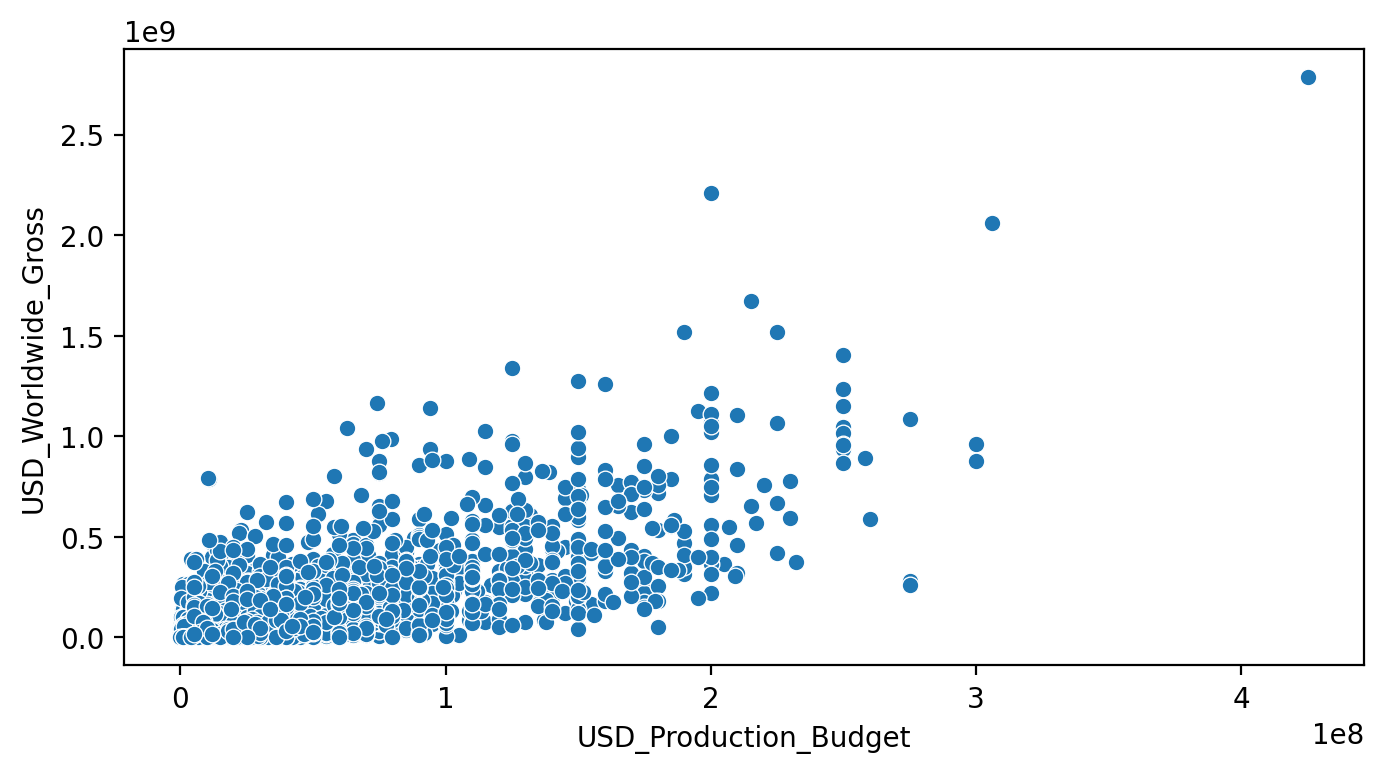

In [41]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
plt.show()

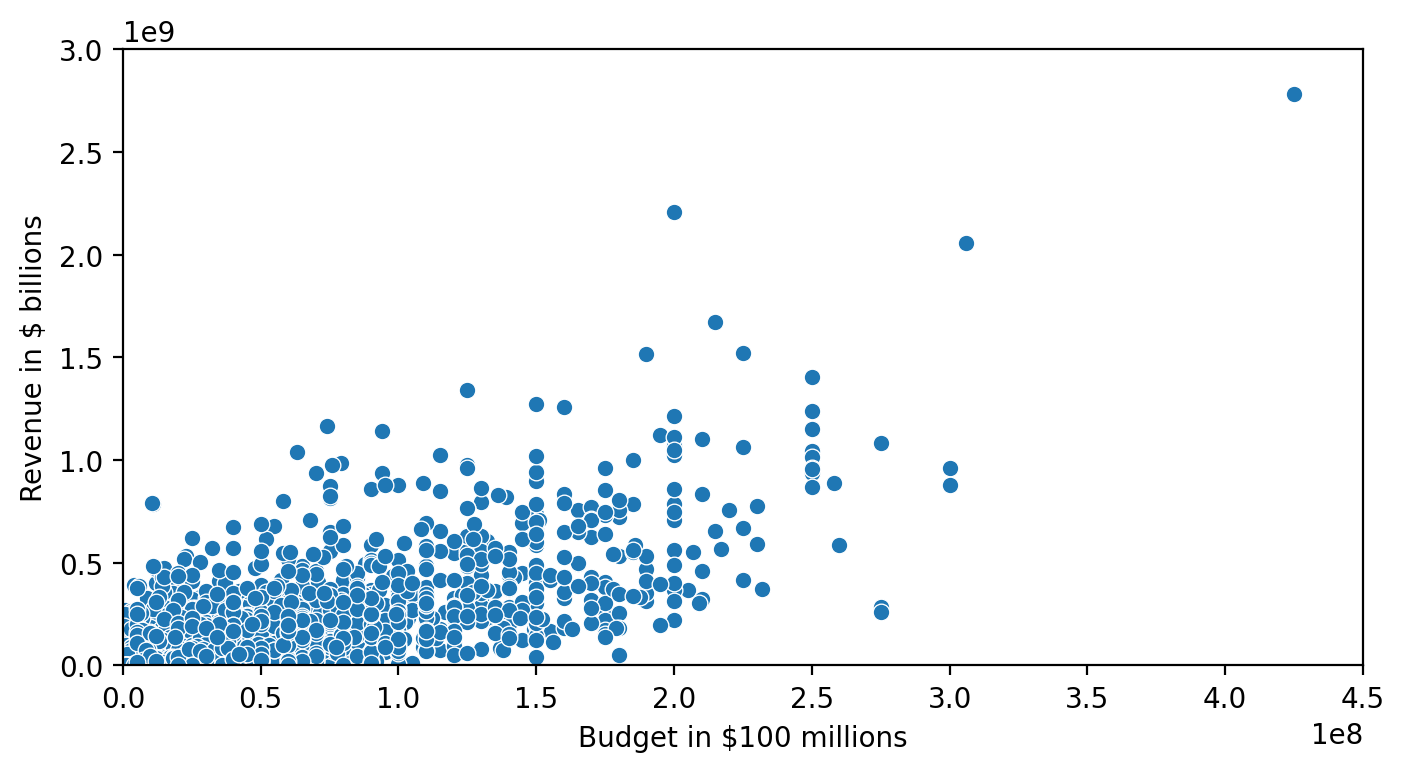

In [42]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

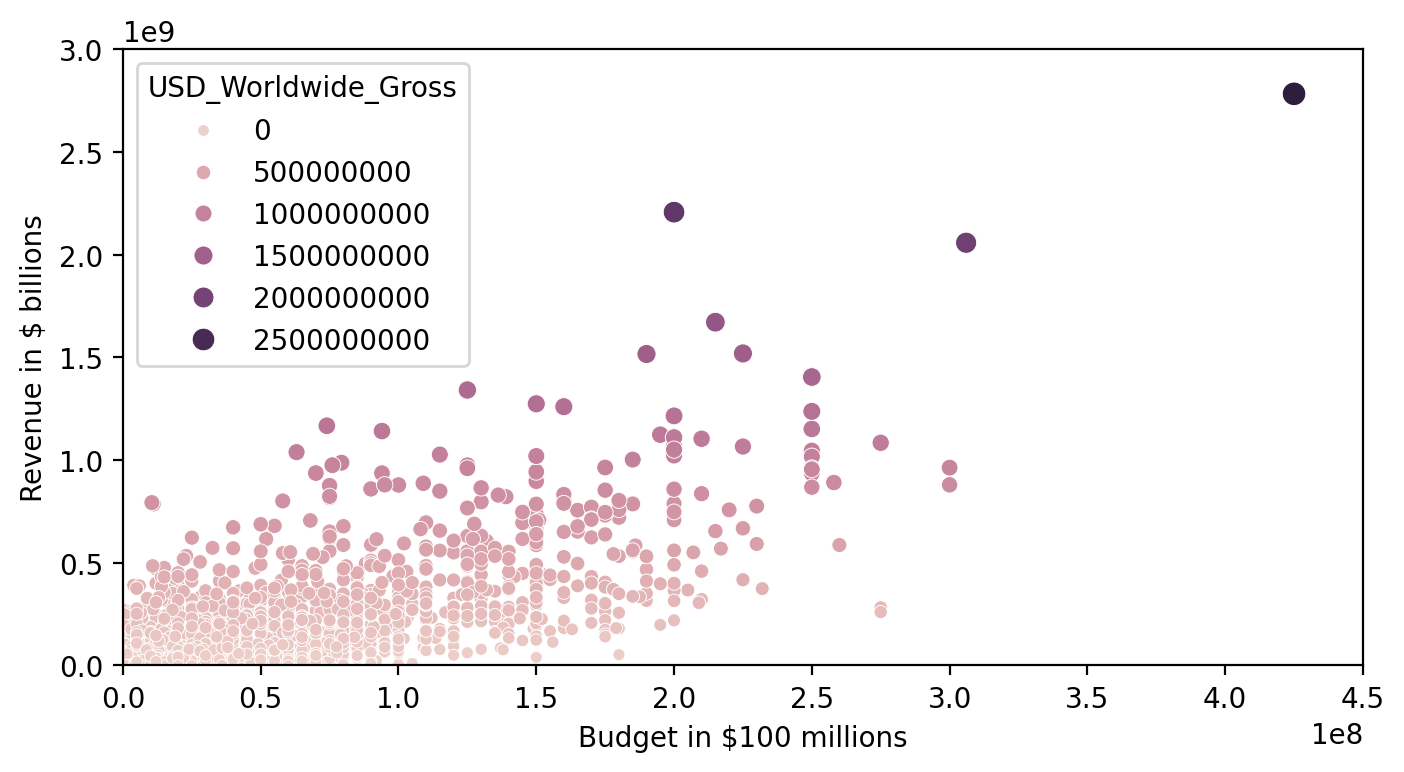

In [43]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



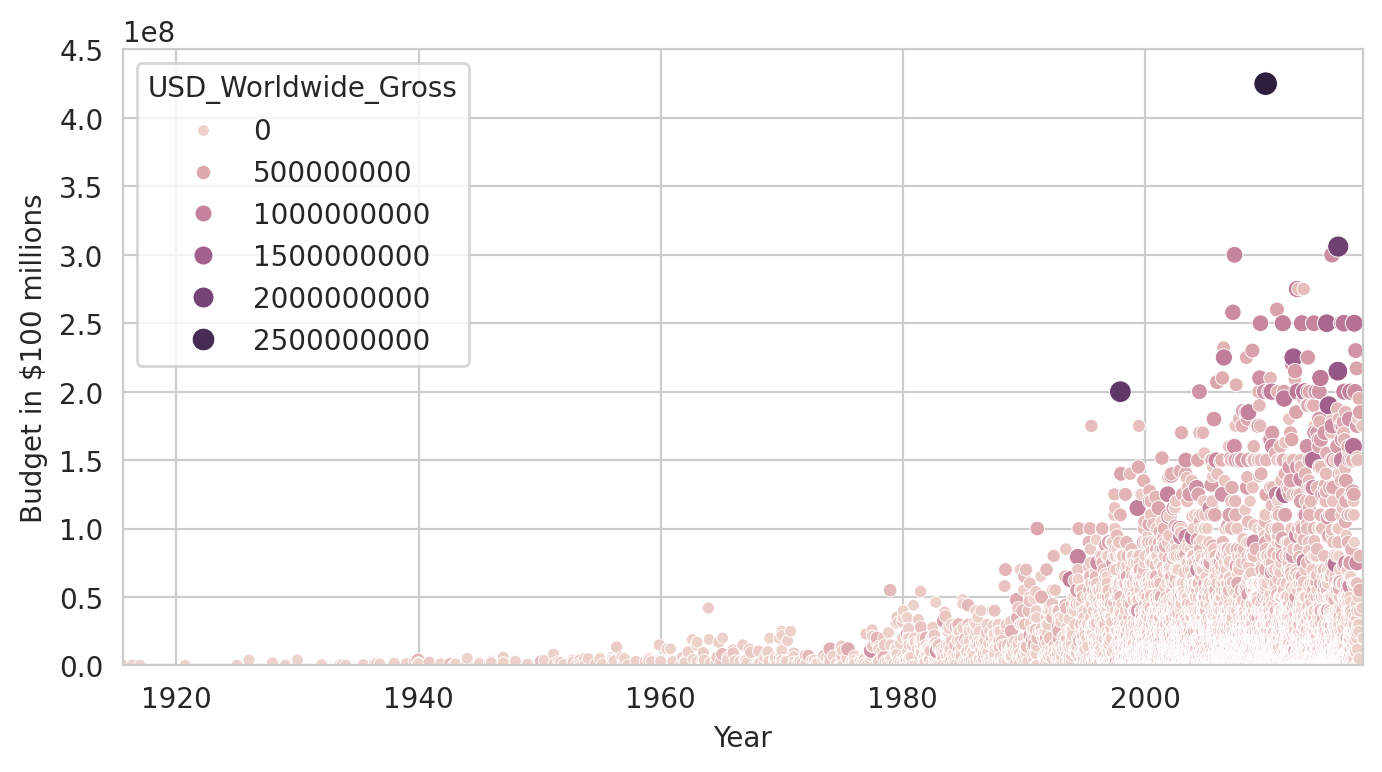

In [44]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=data_clean,
                        x='Release_Date',
                        y='USD_Production_Budget',
                        hue='USD_Worldwide_Gross', # colour
                        size='USD_Worldwide_Gross') # dot size

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

In [45]:
data_clean.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Profit_Index
count,"5,384.00",5384,"5,384.00","5,384.00","5,384.00","5,384.00","5,384.00"
mean,"2,698.11",2003-09-12 00:26:12.659732480,"31,038,476.84","88,970,947.21","41,289,131.75","57,932,470.38",3.87
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00,"-127,426,868.00",-1.00
25%,"1,351.75",1999-12-02 00:00:00,"5,000,000.00","3,929,036.00","1,354,765.25","-2,199,107.50",-0.53
50%,"2,698.50",2006-06-16 00:00:00,"17,000,000.00","27,537,329.00","17,221,932.00","8,197,239.50",0.68
75%,"4,045.25",2011-11-18 00:00:00,"40,000,000.00","96,641,996.25","52,403,530.00","59,625,698.25",2.70
max,"5,391.00",2017-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00","1,799.00"
std,"1,555.79",NaN,"40,440,041.47","168,536,755.89","66,055,507.64","140,948,392.18",30.56


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [46]:
year = data_clean['Release_Date'].dt.year
data_clean['Decade'] = round(year // 10) * 10
data_clean.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Profit_Index,Decade
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990,3.17,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727,2.03,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,-0.20,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343,0.38,2010
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0,-20000000,-1.00,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [47]:
# Create the 'Old_and_New' column and initialize it
data_clean['Old_and_New'] = ''

# Assign 'Old Film' to rows where the year is <= 1969
data_clean.loc[data_clean['Release_Date'].dt.year <= 1969, 'Old_and_New'] = 'Old Film'

# Assign 'New Film' to rows where the year is > 1969
data_clean.loc[data_clean['Release_Date'].dt.year > 1969, 'Old_and_New'] = 'New Film'

# Check the updated DataFrame
data_clean.head()

data_clean.tail()

data_clean.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profit,Profit_Index,Decade,Old_and_New
2790,3003,2006-10-27,Catch a Fire,14000000,5782198,4299773,-8217802,-0.59,2000,New Film


In [48]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

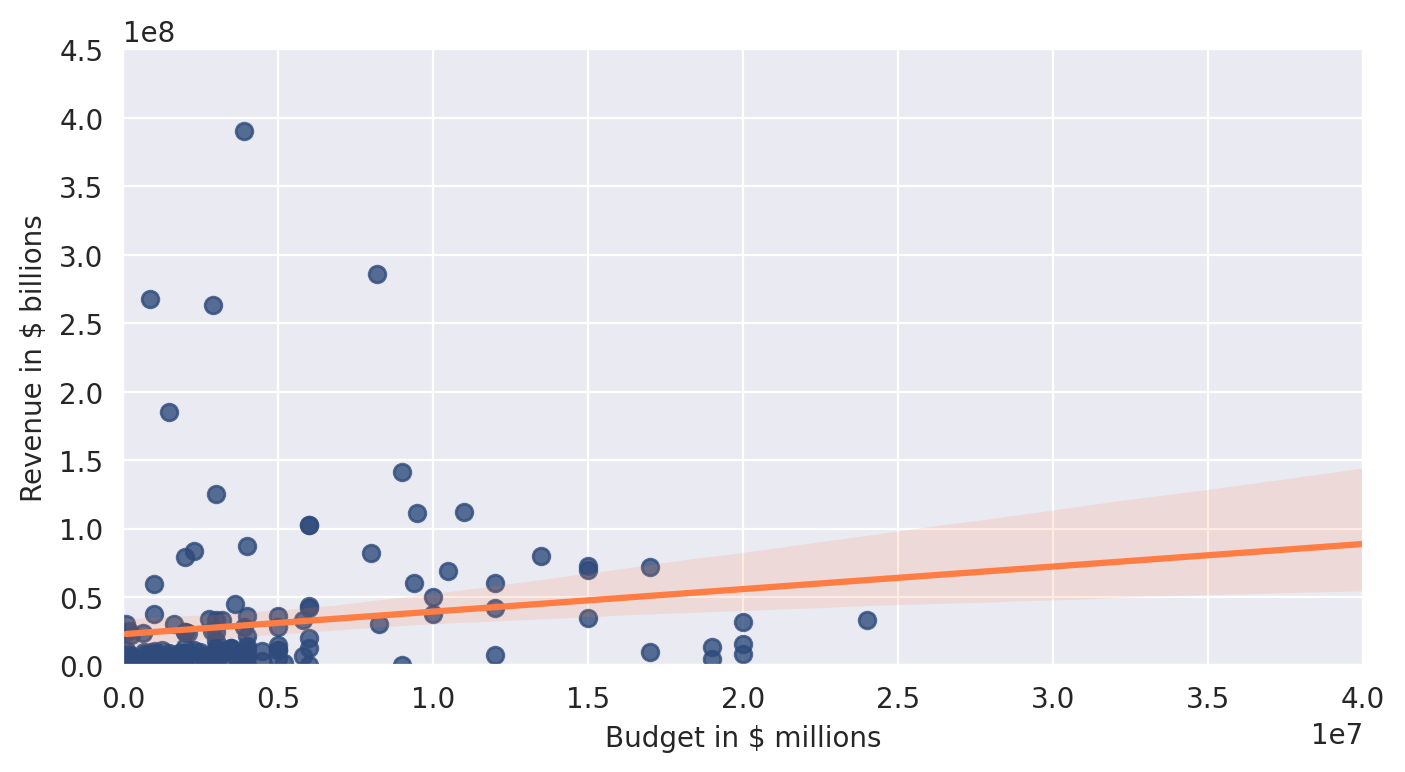

In [49]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
      ax = sns.regplot(data=old_films,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       scatter_kws={'color':'#2f4b7c'},
                       line_kws={'color':'#ff7c43'})
      ax.set(ylabel='Revenue in $ billions',
             xlabel='Budget in $ millions',
             ylim=(0, 450000000),
             xlim=(0, 40000000))


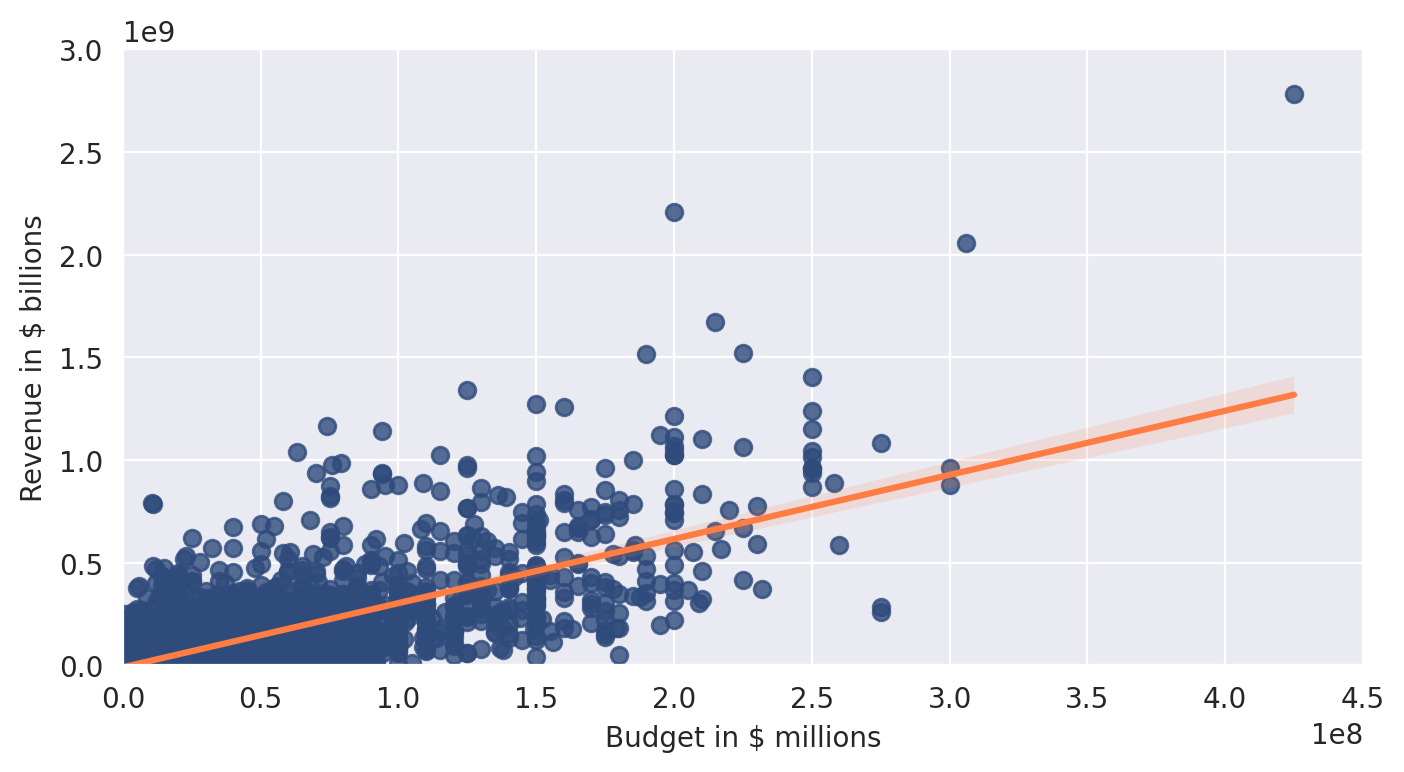

In [50]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
      ax = sns.regplot(data=new_films,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       scatter_kws={'color':'#2f4b7c'},
                       line_kws={'color':'#ff7c43'})
      ax.set(ylabel='Revenue in $ billions',
             xlabel='Budget in $ millions',
             ylim=(0, 3000000000),
             xlim=(0, 450000000))


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [51]:
from sklearn.linear_model import LinearRegression

# Extract the features (BUDGET) and target (REVENUE)
# We need to reshape BUDGET to a 2D array as scikit-learn expects this format
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Create a Linear Regression model
regr = LinearRegression()

# Fit the model to the data
regr.fit(X, y)

# Get the parameters (theta0 and theta1)
theta_0 = regr.intercept_[0]
theta_1 = regr.coef_[0][0]

print(f'Intercept (theta_0): {theta_0:,.2f}')
print(f'Coefficient (theta_1): {theta_1:,.2f}')

# Predict revenue for a budget of $150 million
budget_150_million = 150000000
predicted_revenue = regr.predict([[budget_150_million]])[0][0]
print(f'Predicted revenue for a $150 million budget: ${predicted_revenue:,.2f}')

# Evaluate the model
# Calculate R-squared
r_squared = regr.score(X, y)
print(f'R-squared: {r_squared:.4f}')

Intercept (theta_0): -8,650,768.01
Coefficient (theta_1): 3.12
Predicted revenue for a $150 million budget: $459,738,619.59
R-squared: 0.5577


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [53]:
# Extract features and target for old films
X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Create a Linear Regression model for old films
regr_old = LinearRegression()

# Fit the model to the old films data
regr_old.fit(X_old, y_old)

# Get the parameters for old films
theta_0_old = regr_old.intercept_[0]
theta_1_old = regr_old.coef_[0][0]

print(f'Old Films Intercept (theta_0): {theta_0_old:,.2f}')
print(f'Old Films Coefficient (theta_1): {theta_1_old:,.2f}')

# Evaluate the old films model
# Calculate R-squared for old films
r_squared_old = regr_old.score(X_old, y_old)
print(f'Old Films R-squared: {r_squared_old:.4f}')

print(f'\nThe linear model explains {r_squared_old*100:.2f}% of the variance in movie revenue for the old films.')

Old Films Intercept (theta_0): 22,821,538.64
Old Films Coefficient (theta_1): 1.65
Old Films R-squared: 0.0294

The linear model explains 2.94% of the variance in movie revenue for the old films.


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [64]:
budget = 350000000
revenue = round(theta_0_old + theta_1_old * budget, -6)
print(f'Estimated global revenue is ${revenue:,.2f} when a budget is $350 millions.')

Estimated global revenue is $600,000,000.00 when a budget is $350 millions.


In [71]:
budget = 350000000
revenue = round(theta_0 + theta_1 * budget, -6)
print(f'Estimated global revenue is ${revenue/1000000:,.0f} millions when a budget is $350 millions.')

Estimated global revenue is $1,084 millions when a budget is $350 millions.
